In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from subprocess import check_output

print(check_output(["ls"]).decode("utf8"))

datasets
github_copilot_test.py
kaggle_iris_learning.ipynb
module2.ipynb



In [57]:
iris = pd.read_csv("./datasets/Iris.csv")
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [58]:
# check the inconsistency in the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [59]:
iris.drop('Id',axis=1, inplace=True)
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Some Exploratory Data Analysis with Iris

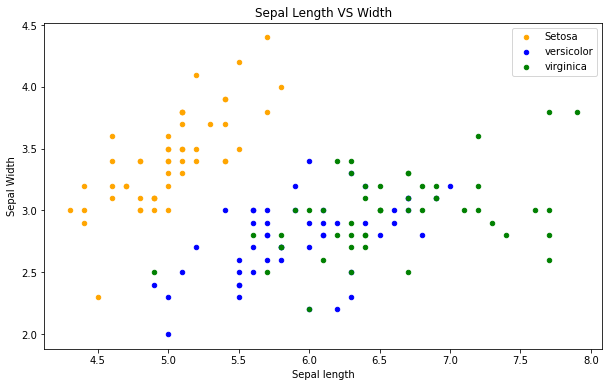

In [60]:
#Sepal Length and Sepal Width Relationship

fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm', y='SepalWidthCm', color='blue', label='versicolor', ax=fig )
iris[iris.Species=='Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='virginica', ax=fig )
fig.set_xlabel('Sepal length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length VS Width')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

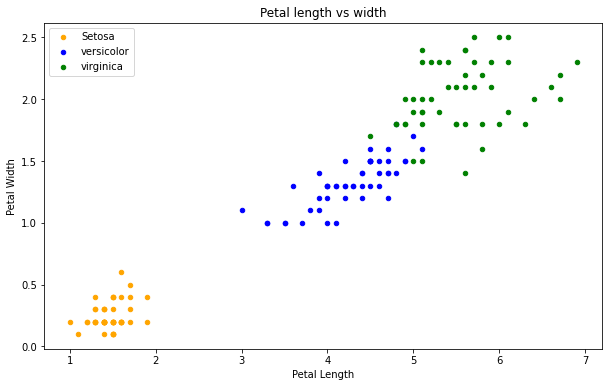

In [61]:
#Petal Length and Petal Width Replationship
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='versicolor', ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='virginica', ax=fig)
fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal length vs width')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

##### How data are distributted

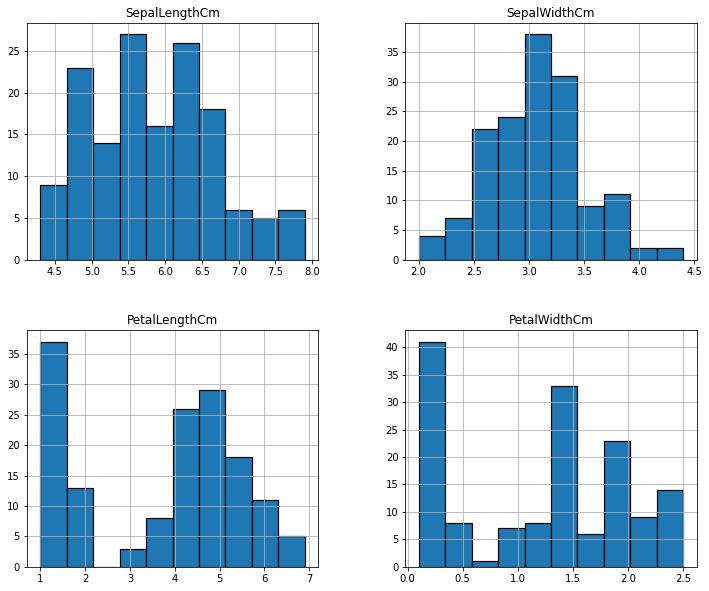

In [62]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,10)
plt.show()

In [63]:
# plt.figure(figsize=(15,10))
# plt.subplot(2,2,1)
# sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
# plt.subplot(2,2,2)
# sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
# plt.subplot(2,2,3)
# sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
# plt.subplot(2,2,4)
# sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [64]:
#import all the necessary packages of sklearn algorithms.
from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [65]:
iris.shape

(150, 5)

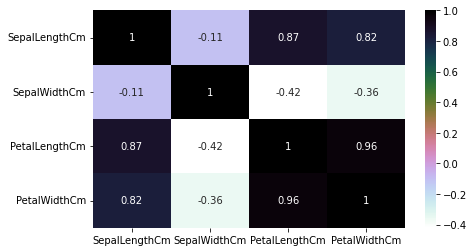

In [66]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [67]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [70]:
train, test = train_test_split(iris, test_size=0.3)

print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [71]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_y = test.Species

In [73]:
print(train_X.head(2))
print(test_X.head(2))
print(train_y.head(2))
print(test_y.head(2))


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
116            6.5           3.0            5.5           1.8
10             5.4           3.7            1.5           0.2
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
23             5.1           3.3            1.7           0.5
129            7.2           3.0            5.8           1.6
116    Iris-virginica
10        Iris-setosa
Name: Species, dtype: object
23        Iris-setosa
129    Iris-virginica
Name: Species, dtype: object


##### Support Vector Machine

In [74]:
model = svm.SVC()
model.fit(train_X, train_y)

prediction = model.predict(test_X)

print('The accuracy of the SVM is:', metrics.accuracy_score(prediction, test_y))

The accuracy of the SVM is: 0.9333333333333333


##### Logistic Regression

In [75]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction, test_y))

The accuracy of the Logistic Regression is 0.9777777777777777


##### Decision Tree

In [77]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction, test_y))

The accuracy of the Decision Tree is 0.9555555555555556


K- Nearest Neighbours

In [78]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction, test_y))

The accuracy of the KNN is 0.9333333333333333


KNN with various values of neighbours

/tmp/ipykernel_24424/3959963847.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a = pd.Series()
/tmp/ipykernel_24424/3959963847.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
/tmp/ipykernel_24424/3959963847.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
/tmp/ipykernel_24424/3959963847.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
/tmp/ipykernel_24424/3959963847.py:8: FutureWarning: The series

([<matplotlib.axis.XTick at 0x7f1214cfeda0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

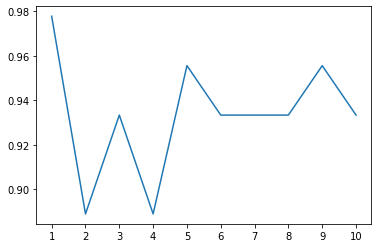

In [80]:
a_index = list(range(1,11))
a = pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
plt.xticks(x)

Creating Petals And Sepals Training Data